In [2]:
import pandas as pd
import numpy as np
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict

In [3]:
data_path = 'data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

In [55]:
# Side information
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [56]:
print(f"train_df 길이: {len(train_df)}, (user, item) 중복값 제거한 train_df 길이: {len(train_df.drop_duplicates(['user','item']))}")
print('즉, 본 영화 또 본 경우 없음')
print('='*50)
print(f"전체 영화 수: {train_df['item'].nunique()}")
print(f"year 정보 있는 영화 수: {year_data['item'].nunique()}")
print(f"writer 정보 있는 영화 수: {writer_data['item'].nunique()}")
print(f"title 정보 있는 영화 수: {title_data['item'].nunique()}")
print(f"genre 정보 있는 영화 수: {genre_data['item'].nunique()}")
print(f"director 정보 있는 영화 수: {director_data['item'].nunique()}")
print('='*50)
print(f"genre_data 길이: {len(genre_data)}, item 중복값 제거한 genre_data 길이: {len(genre_data.drop_duplicates('item'))}")
print('즉, genre가 여러 개인 영화 존재')
print(f"writer_data 길이: {len(writer_data)}, item 중복값 제거한 writer_data 길이: {len(writer_data.drop_duplicates('item'))}")
print('즉, writer가 여러 명인 영화 존재')
print(f"director_data 길이: {len(director_data)}, item 중복값 제거한 director_data 길이: {len(director_data.drop_duplicates('item'))}")
print('즉, director가 여러 명인 영화 존재')

train_df 길이: 5154471, (user, item) 중복값 제거한 train_df 길이: 5154471
즉, 본 영화 또 본 경우 없음
전체 영화 수: 6807
year 정보 있는 영화 수: 6799
writer 정보 있는 영화 수: 5648
title 정보 있는 영화 수: 6807
genre 정보 있는 영화 수: 6807
director 정보 있는 영화 수: 5503
genre_data 길이: 15933, item 중복값 제거한 genre_data 길이: 6807
즉, genre가 여러 개인 영화 존재
writer_data 길이: 11306, item 중복값 제거한 writer_data 길이: 5648
즉, writer가 여러 명인 영화 존재
director_data 길이: 5905, item 중복값 제거한 director_data 길이: 5503
즉, director가 여러 명인 영화 존재


In [57]:
# datetime 객체로 변환
train_df['time'] = pd.to_datetime(train_df['time'].apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x))))

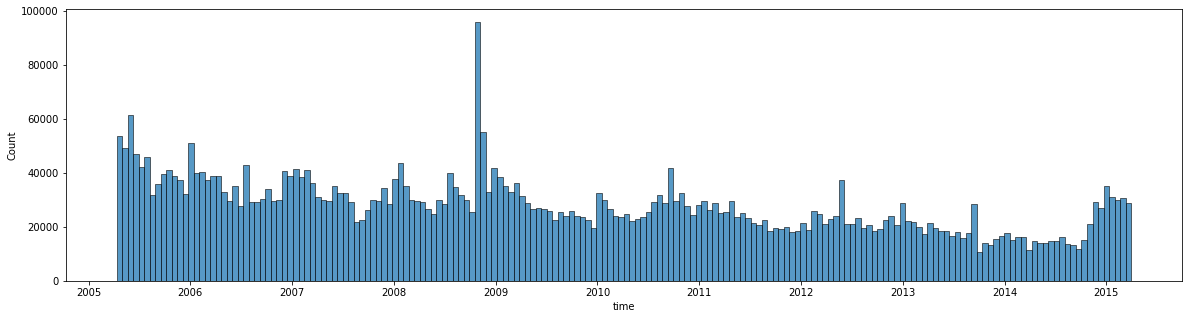

In [58]:
# 연월일별 분포
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.histplot(train_df, x='time', ax=axes)

plt.show()

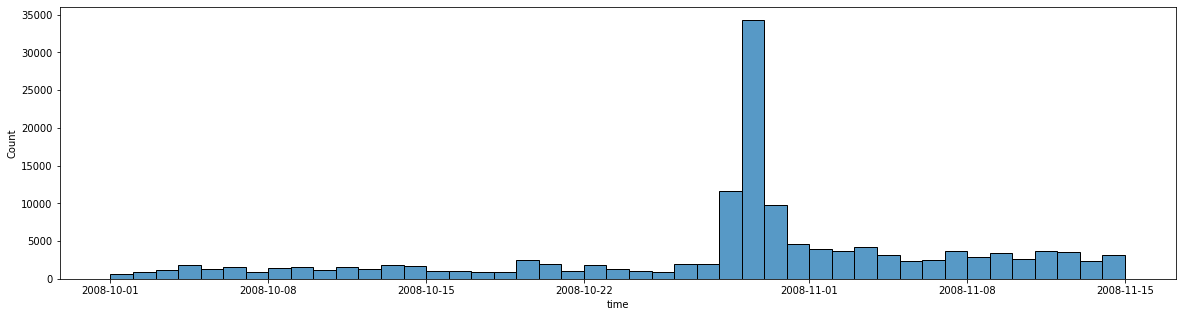

In [59]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.histplot(train_df[(train_df['time']>'2008-10') & (train_df['time']<'2008-11-15')], x='time', ax=axes, bins=45)

plt.show()

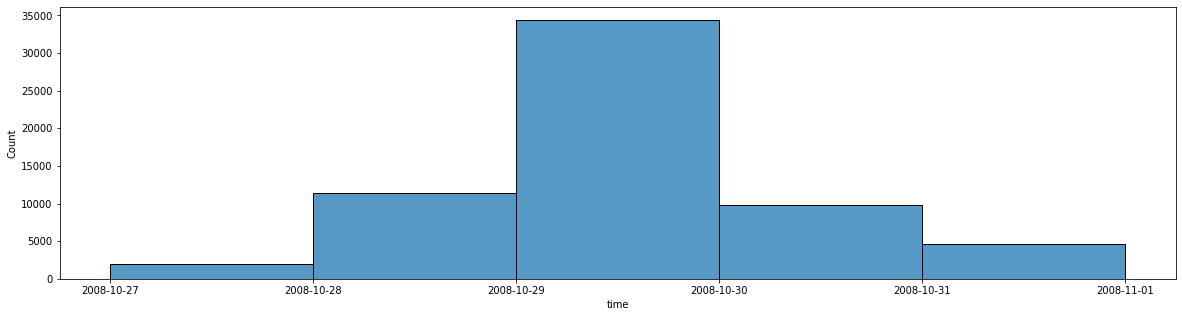

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.histplot(train_df[(train_df['time']>'2008-10-27') & (train_df['time']<'2008-11')], x='time', ax=axes, bins=5)

plt.show()

In [61]:
train_df[(train_df['time']>'2008-10-29') & (train_df['time']<'2008-10-30')].groupby('user').count().sort_values('item',ascending=False).head(30)

,item,time
user,,
13955,578,578
124861,532,532
17818,488,488
70143,384,384
94331,363,363
28724,296,296
89046,293,293
68507,277,277
97845,270,270


In [109]:
gt_df = pd.read_csv('/opt/ml/input/ml-20m/ratings.csv')

In [110]:
isinfilter = gt_df['userId'].isin(train_df['user'].unique())
gt_df = gt_df[isinfilter]

In [111]:
isinfilter = gt_df['movieId'].isin(train_df['item'].unique())
gt_df = gt_df[isinfilter]

In [112]:
# datetime 객체로 변환
gt_df['timestamp'] = pd.to_datetime(gt_df['timestamp'].apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x))))

In [142]:
min(train_df['time'])

Timestamp('2005-04-11 11:56:25')

In [128]:
train_df['user'].unique()

array([    11,     14,     18, ..., 138486, 138492, 138493])

In [136]:
temp = train_df.groupby('user').count()
temp[temp['item']<10]

,item,time
user,,


In [137]:
train_df[train_df['user']==138486]

,user,item,time
5153952,138486,2694,2008-04-01 18:32:53
5153953,138486,1994,2008-04-01 18:33:04
5153954,138486,2723,2008-04-01 18:33:25
5153955,138486,441,2008-04-01 18:33:42
5153956,138486,2288,2008-04-01 18:33:53
...,...,...,...
5154084,138486,8874,2008-04-01 19:06:18
5154085,138486,4720,2008-04-01 19:06:23
5154086,138486,1215,2008-04-01 19:06:41
5154087,138486,6242,2008-04-01 19:06:57


In [140]:
temp = gt_df[gt_df['userId']==138486].sort_values('timestamp')
temp[temp['rating']>=3.5]

,userId,movieId,rating,timestamp
19999409,138486,2694,5.0,2008-04-01 18:32:53
19999387,138486,1994,4.0,2008-04-01 18:33:04
19999414,138486,2723,4.0,2008-04-01 18:33:25
19999336,138486,441,5.0,2008-04-01 18:33:42
19999398,138486,2288,4.0,2008-04-01 18:33:53
...,...,...,...,...
19999362,138486,1215,5.0,2008-04-01 19:06:41
19999459,138486,6242,4.5,2008-04-01 19:06:57
19999462,138486,6502,4.5,2008-04-01 19:07:00
19999423,138486,3081,3.5,2008-04-01 19:07:03


In [69]:
train_df[train_df['user']==138493]

,user,item,time
5154157,138493,3174,2009-10-17 18:39:05
5154158,138493,2872,2009-10-17 18:39:44
5154159,138493,48780,2009-10-17 18:39:59
5154160,138493,2662,2009-10-17 18:40:43
5154161,138493,2840,2009-10-17 18:40:50
...,...,...,...
5154466,138493,44022,2009-12-07 18:10:49
5154467,138493,4958,2009-12-07 18:11:22
5154468,138493,68319,2009-12-07 18:15:20
5154469,138493,40819,2009-12-07 18:15:26


In [84]:
gt_df = pd.read_csv('gt_df.csv')

In [85]:
gt_df

,userId,movieId,rating,timestamp
0,11,1,4.5,2009-01-02 01:13:41
1,11,10,2.5,2009-01-02 01:15:59
2,11,19,3.5,2009-01-01 04:21:44
3,11,32,5.0,2009-01-01 04:11:35
4,11,39,4.5,2009-01-02 01:17:12
...,...,...,...,...
9506150,138493,68954,4.5,2009-11-13 15:42:00
9506151,138493,69526,4.5,2009-12-03 18:31:48
9506152,138493,69644,3.0,2009-12-07 18:10:57
9506153,138493,70286,5.0,2009-11-13 15:42:24


In [88]:
submission = pd.read_csv('most_popular_submission.csv')

In [91]:
wrong_amt = defaultdict(int)

In [93]:
for user in tqdm(gt_df['userId'].unique()):
    gt = gt_df[gt_df['userId']==user]['movieId'].unique()
    for item in submission[submission['user']==user]['item'].unique():
        if item not in gt:
            wrong_amt[user] += 1

100%|██████████| 31360/31360 [07:32<00:00, 69.28it/s]


In [95]:
wrong_amt = pd.DataFrame(list(wrong_amt.items()), columns=['user', 'wrong_amt'])
wrong_amt

,user,wrong_amt
0,14,8
1,18,3
2,25,1
3,31,5
4,35,1
...,...,...
24179,138473,4
24180,138475,10
24181,138486,2
24182,138492,7


In [98]:
sum(wrong_amt['wrong_amt'])

93938